In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
target_lec = pd.read_csv('target_lec.csv')
data_lec = pd.read_csv('data_lec.csv')

# Объединение данных по временной метке
data = pd.merge(target_lec, data_lec, on='timestamp')

data.fillna(method='ffill', inplace=True)

X = data.drop(columns=['timestamp', 'target_x'])
y = data['target_x']

<ipython-input-5-e2d5abea07af>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

MSE: 0.7735054299442402, R²: -0.006573283821206477


<ipython-input-16-e26ec5eca038>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


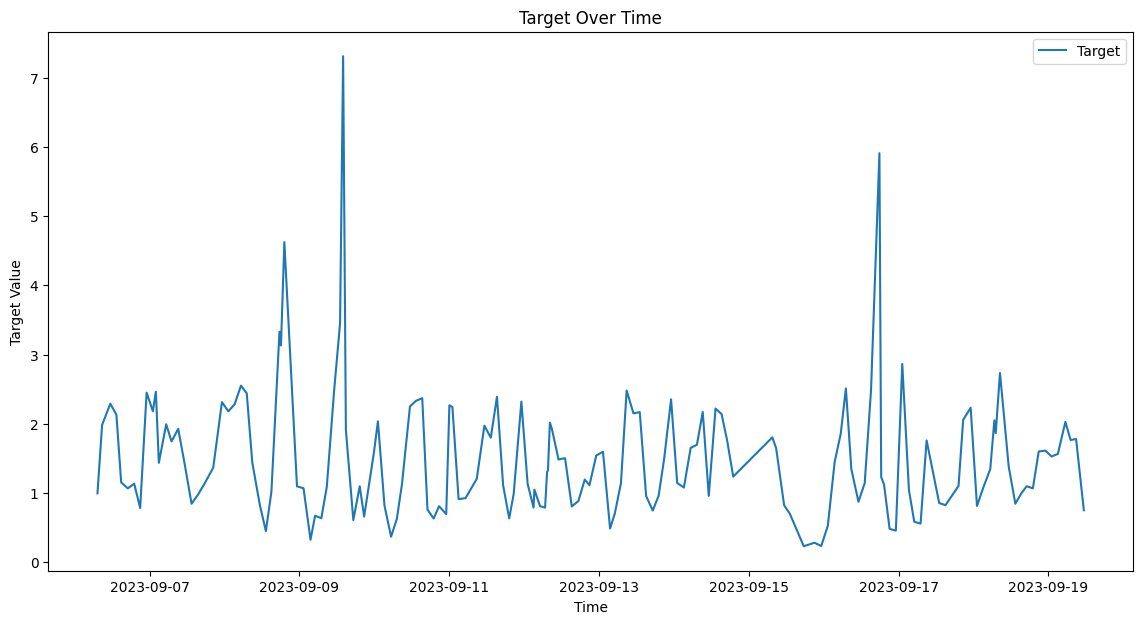

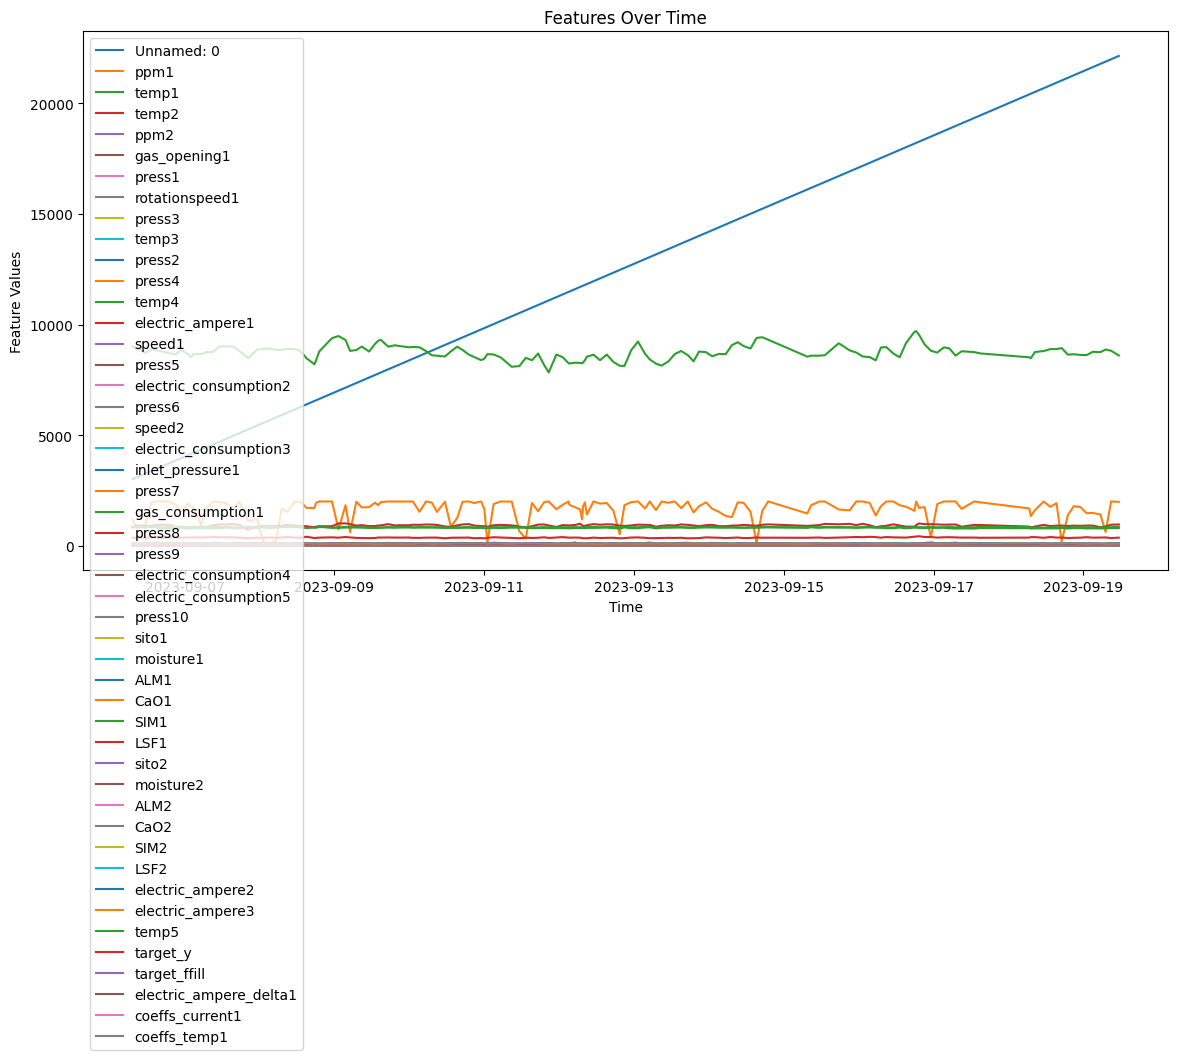

Количество наблюдений: 158


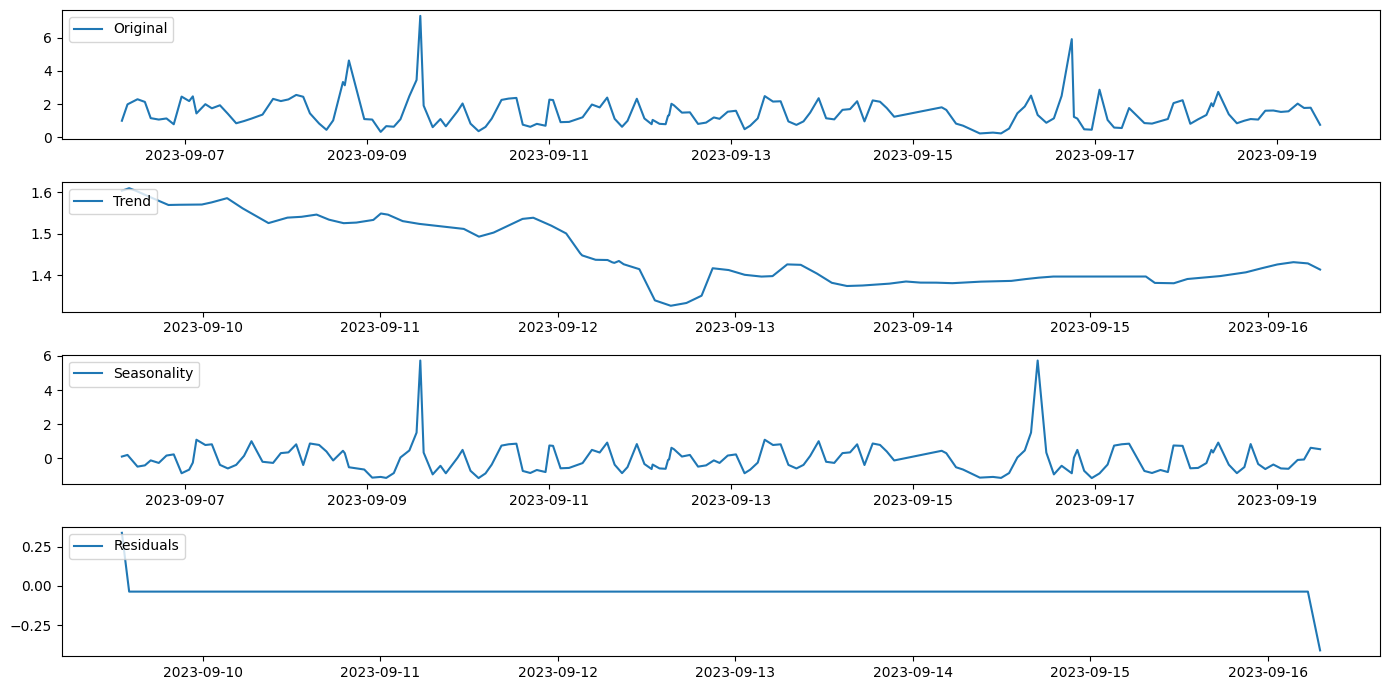

In [16]:
target_lec = pd.read_csv('target_lec.csv')
data_lec = pd.read_csv('data_lec.csv')

data = pd.merge(target_lec, data_lec, on='timestamp')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data.fillna(method='ffill', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['target_x'], label='Target')
plt.title('Target Over Time')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.legend()
plt.show()

features = data.columns.drop('target_x')
plt.figure(figsize=(14, 7))
for feature in features:
    plt.plot(data.index, data[feature], label=feature)
plt.title('Features Over Time')
plt.xlabel('Time')
plt.ylabel('Feature Values')
plt.legend()
plt.show()

print(f"Количество наблюдений: {len(data)}")

# Если данных недостаточно для периода в 1440 минут, попробуем другой период
if len(data) < 2880:
    period = len(data) // 2  # Попробуем использовать половину данных для периода
else:
    period = 1440

decomposition = seasonal_decompose(data['target_x'], model='additive', period=period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(data.index, data['target_x'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(data.index, trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(data.index, seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(data.index, residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrusozei/9zswtu3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrusozei/bqs_fb9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86161', 'data', 'file=/tmp/tmpdrusozei/9zswtu3b.json', 'init=/tmp/tmpdrusozei/bqs_fb9o.json', 'output', 'file=/tmp/tmpdrusozei/prophet_modelt0_wvwhe/prophet_model-20241219091435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-package

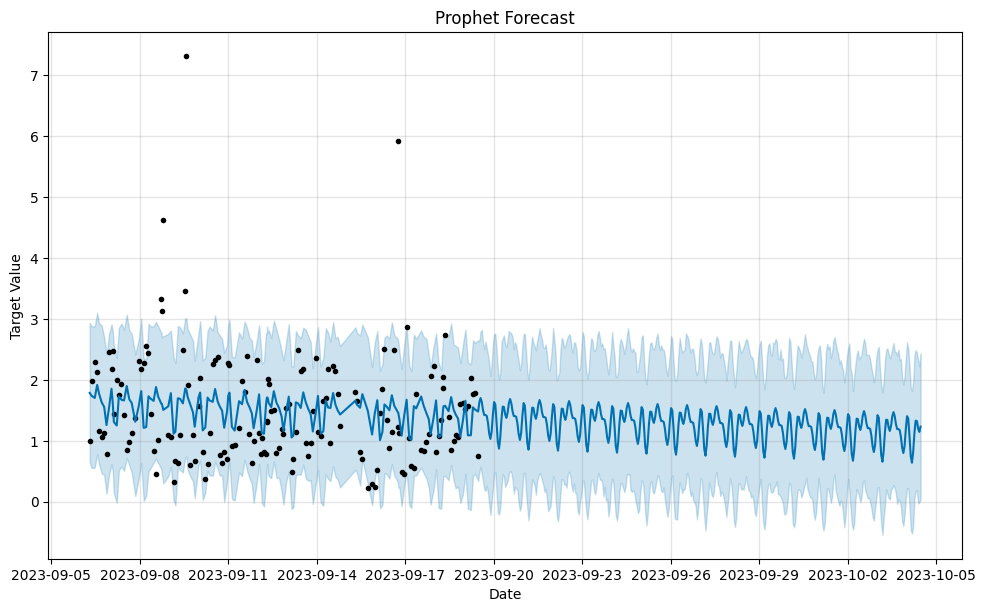

In [24]:
from prophet import Prophet

data = pd.read_csv('target_lec.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'] = data['timestamp'].dt.tz_localize(None)
data = data.rename(columns={'timestamp': 'ds', 'target': 'y'})

# Создание и обучение модели Prophet
model = Prophet()
model.fit(data)

# Прогнозирование
future = model.make_future_dataframe(periods=360, freq='H')  # Прогноз на 15 дней вперед с частотой 1 час
forecast = model.predict(future)

# Визуализация прогноза
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.show()

#LSTM

In [104]:
data_lec.columns

Index(['Unnamed: 0', 'timestamp', 'ppm1', 'temp1', 'temp2', 'ppm2',
       'gas_opening1', 'press1', 'rotationspeed1', 'press3', 'temp3', 'press2',
       'press4', 'temp4', 'electric_ampere1', 'speed1', 'press5',
       'electric_consumption2', 'press6', 'speed2', 'electric_consumption3',
       'inlet_pressure1', 'press7', 'gas_consumption1', 'press8', 'press9',
       'electric_consumption4', 'electric_consumption5', 'press10', 'sito1',
       'moisture1', 'ALM1', 'CaO1', 'SIM1', 'LSF1', 'sito2', 'moisture2',
       'ALM2', 'CaO2', 'SIM2', 'LSF2', 'electric_ampere2', 'electric_ampere3',
       'temp5', 'target', 'target_ffill', 'electric_ampere_delta1',
       'coeffs_current1', 'coeffs_temp1'],
      dtype='object')

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Загрузка данных
target_lec = pd.read_csv('target_lec.csv')
data_lec = pd.read_csv('data_lec.csv')

# Объединение данных по временным меткам
merged_data = pd.merge(data_lec, target_lec, on='timestamp')

# Удаление ненужных столбцов
merged_data.drop(columns=['target_ffill', 'electric_ampere_delta1', 'coeffs_current1', 'coeffs_temp1'], inplace=True)

# Проверка наличия NaN значений
if merged_data.isnull().values.any():
    print("Data contains NaN values. Please handle them before proceeding.")
    # Удаление столбцов с NaN значениями
    merged_data.dropna(axis=1, inplace=True)
else:
    print("No NaN values in the data.")

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data.drop(columns=['timestamp']))

# Создание входных данных для LSTM
def create_dataset(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length, -1])  # Таргет находится в последнем столбце
    return np.array(X), np.array(y)

sequence_length = 24
X, y = create_dataset(scaled_data, sequence_length)

# Разделение данных на тренировочные и тестовые
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Изменение формы данных для подачи в RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

Data contains NaN values. Please handle them before proceeding.


In [101]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=20))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 0.0339 - val_loss: 0.0216
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0294 - val_loss: 0.0197
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0253 - val_loss: 0.0093
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0232 - val_loss: 0.0138
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0233 - val_loss: 0.0083
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0291 - val_loss: 0.0065
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0271 - val_loss: 0.0068
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0196 - val_loss: 0.0071
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0211 - val_loss: 0.0067
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0213 - val_loss: 0.0066
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0263 - val_loss: 0.0071
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0238 - val_loss: 0.0069


In [102]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Обратное преобразование нормализованных данных
y_pred = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.5393114923680492
Mean Squared Error (MSE): 0.4714690317763751
Root Mean Squared Error (RMSE): 0.6866360256907404


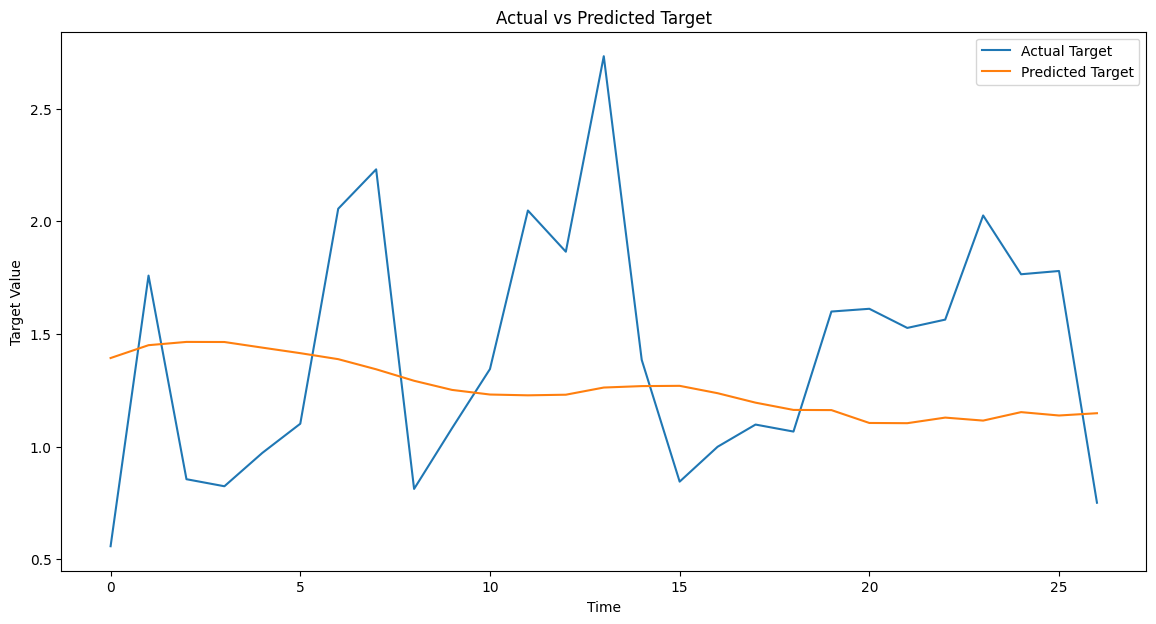

In [72]:
import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Target')
plt.plot(y_pred, label='Predicted Target')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Target')
plt.legend()
plt.show()

In [62]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))  # Выходной слой

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Обратное преобразование нормализованных данных
y_pred = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0862 - val_loss: 1.4840
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0375 - val_loss: 2.0739
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0374 - val_loss: 1.9462
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0235 - val_loss: 1.7290
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0201 - val_loss: 1.8016
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0263 - val_loss: 1.8786
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0242 - val_loss: 1.9054
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0194 - val_loss: 1.8861
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0248 - val_loss: 1.8253
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0200 - val_loss: 1.8379
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0243 - val_loss: 1.8661
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0238 - val_loss: 1.9036


In [ ]:
# Создание данных для прогнозирования на горизонте 15 минут
def create_future_dataset(data, sequence_length=24, horizon=15):
    X, y = [], []
    for i in range(len(data) - sequence_length - horizon):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length + horizon, -1])  # Таргет на горизонте 15 минут
    return np.array(X), np.array(y)

X_future, y_future = create_future_dataset(scaled_data, sequence_length, horizon=15)

# Разделение данных на тренировочные и тестовые
split = int(0.8 * len(X_future))
X_future_train, X_future_test = X_future[:split], X_future[split:]
y_future_train, y_future_test = y_future[:split], y_future[split:]

# Изменение формы данных для подачи в RNN (samples, timesteps, features)
X_future_train = X_future_train.reshape((X_future_train.shape[0], X_future_train.shape[1], X_future_train.shape[2]))
X_future_test = X_future_test.reshape((X_future_test.shape[0], X_future_test.shape[1], X_future_test.shape[2]))

# Обучение модели для прогнозирования на горизонте 15 минут
history_future = model.fit(X_future_train, y_future_train, epochs=10, batch_size=32, validation_data=(X_future_test, y_future_test), verbose=1)

In [ ]:
# Создание данных для прогнозирования при изменении gas_consumption1
def create_modified_dataset(data, sequence_length=24, horizon=15, gas_consumption_change=150):
    X, y = [], []
    for i in range(len(data) - sequence_length - horizon):
        modified_data = data[i:i + sequence_length].copy()
        modified_data[:, data_lec.columns.get_loc('gas_consumption1')] += gas_consumption_change
        X.append(modified_data)
        y.append(data[i + sequence_length + horizon, -1])  # Таргет на горизонте 15 минут
    return np.array(X), np.array(y)

X_modified, y_modified = create_modified_dataset(scaled_data, sequence_length, horizon=15, gas_consumption_change=150)

# Разделение данных на тренировочные и тестовые
split = int(0.8 * len(X_modified))
X_modified_train, X_modified_test = X_modified[:split], X_modified[split:]
y_modified_train, y_modified_test = y_modified[:split], y_modified[split:]

# Изменение формы данных для подачи в RNN (samples, timesteps, features)
X_modified_train = X_modified_train.reshape((X_modified_train.shape[0], X_modified_train.shape[1], X_modified_train.shape[2]))
X_modified_test = X_modified_test.reshape((X_modified_test.shape[0], X_modified_test.shape[1], X_modified_test.shape[2]))

# Обучение модели для прогнозирования при изменении gas_consumption1
history_modified = model.fit(X_modified_train, y_modified_train, epochs=10, batch_size=32, validation_data=(X_modified_test, y_modified_test), verbose=1)

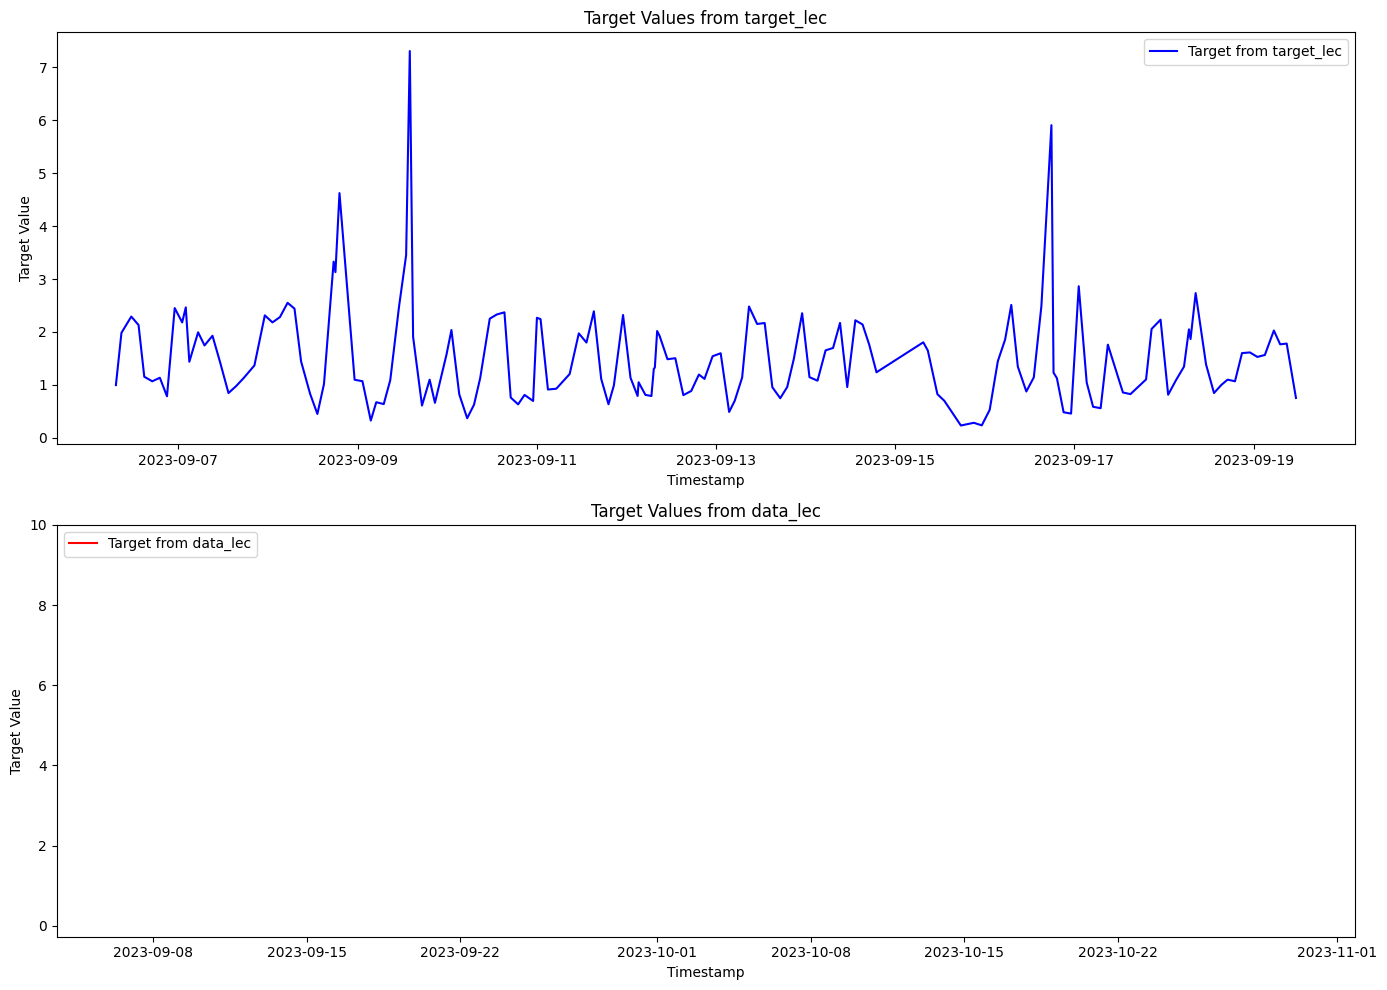

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файлов
target_lec = pd.read_csv('target_lec.csv')
data_lec = pd.read_csv('data_lec.csv')

# Преобразование столбца timestamp в формат datetime
target_lec['timestamp'] = pd.to_datetime(target_lec['timestamp'])
data_lec['timestamp'] = pd.to_datetime(data_lec['timestamp'])

# Выбор только нужных столбцов из data_lec
data_lec_selected = data_lec[['timestamp', 'target']]

# Построение графиков
plt.figure(figsize=(14, 10))

# График для target_lec
plt.subplot(2, 1, 1)
plt.plot(target_lec['timestamp'], target_lec['target'], label='Target from target_lec', color='blue')
plt.title('Target Values from target_lec')
plt.xlabel('Timestamp')
plt.ylabel('Target Value')
plt.legend()

# График для data_lec
plt.subplot(2, 1, 2)
plt.plot(data_lec_selected['timestamp'], data_lec_selected['target'], label='Target from data_lec', color='red')
plt.title('Target Values from data_lec')
plt.xlabel('Timestamp')
plt.ylabel('Target Value')
plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()

In [10]:
data_lec_filtered = data_lec[data_lec['target'] != 0]

# Подсчет количества оставшихся строк
remaining_rows = data_lec_filtered.shape[0]

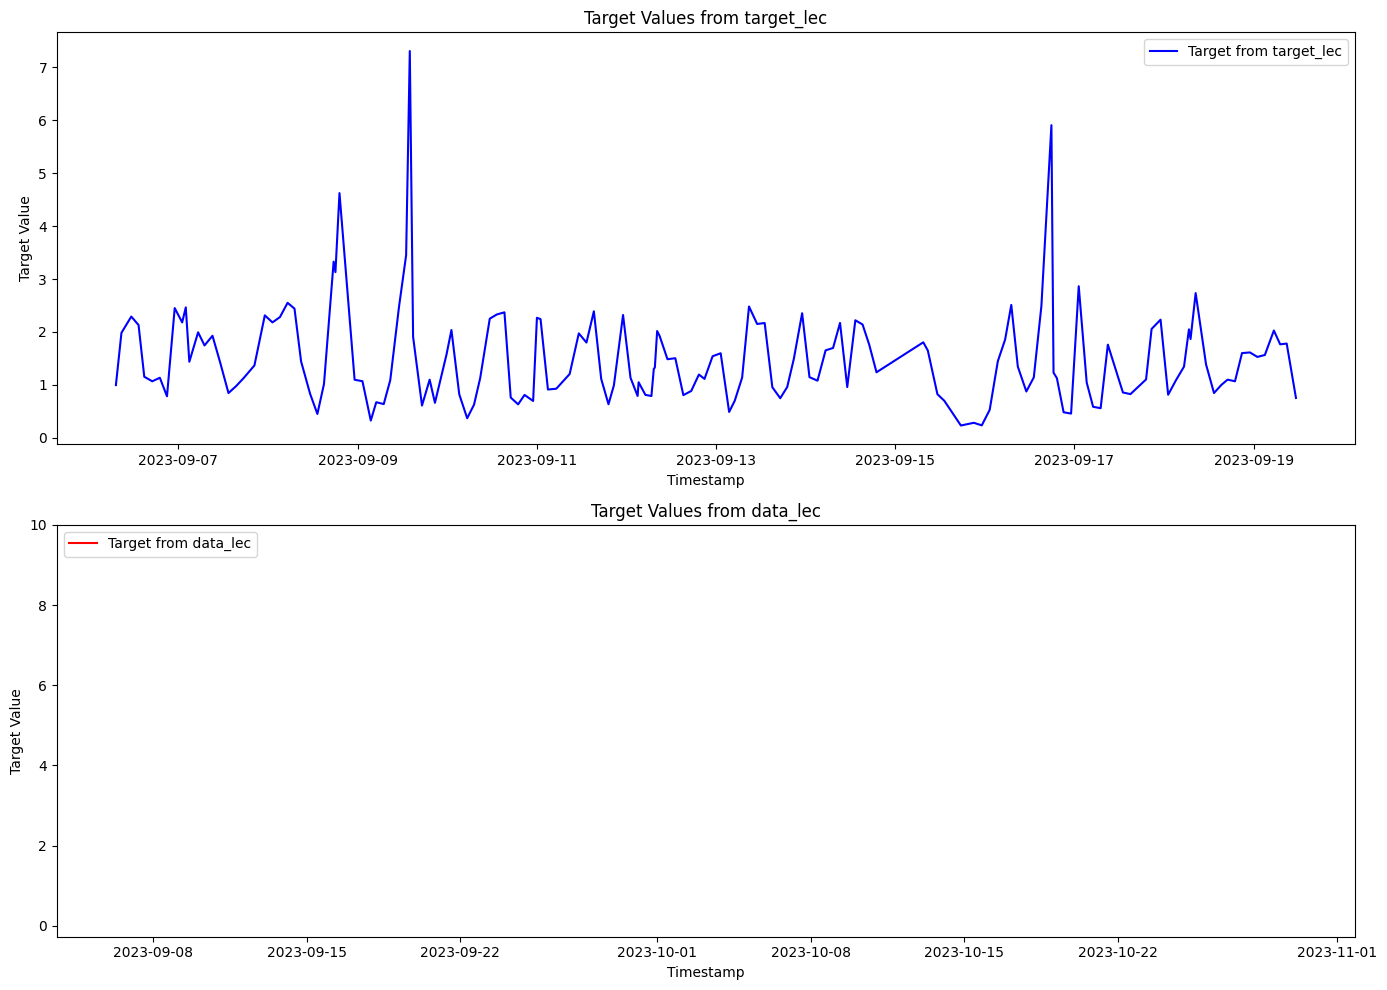

In [12]:
data_lec_selected = data_lec_filtered[['timestamp', 'target']]

# Построение графиков
plt.figure(figsize=(14, 10))

# График для target_lec
plt.subplot(2, 1, 1)
plt.plot(target_lec['timestamp'], target_lec['target'], label='Target from target_lec', color='blue')
plt.title('Target Values from target_lec')
plt.xlabel('Timestamp')
plt.ylabel('Target Value')
plt.legend()

# График для data_lec
plt.subplot(2, 1, 2)
plt.plot(data_lec_selected['timestamp'], data_lec_selected['target'], label='Target from data_lec', color='red')
plt.title('Target Values from data_lec')
plt.xlabel('Timestamp')
plt.ylabel('Target Value')
plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()

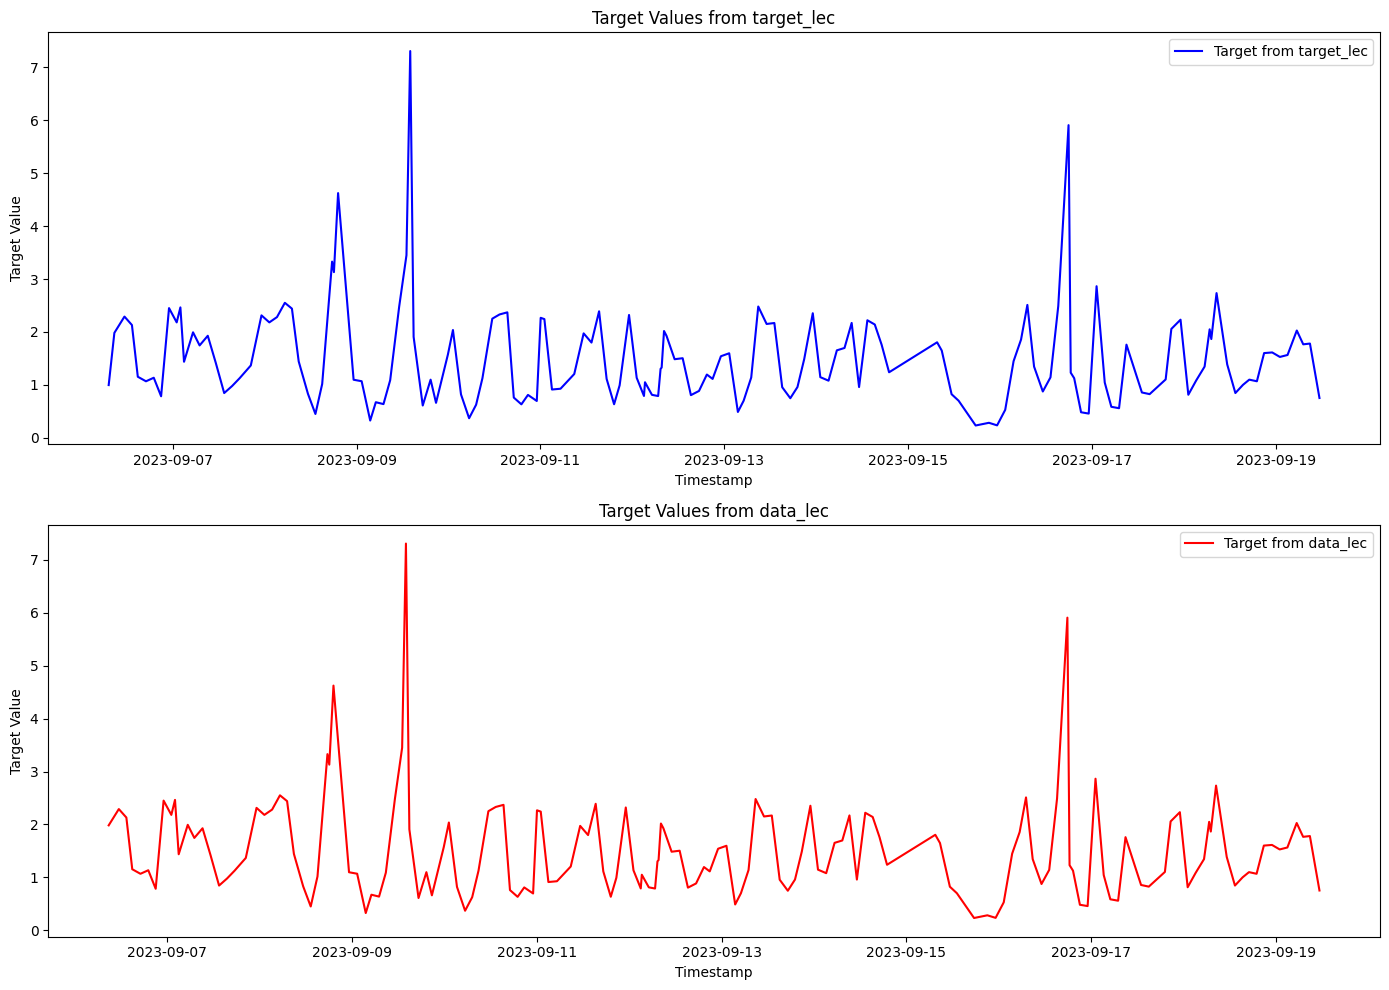

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
data_lec = pd.read_csv('data_lec.csv')

# Преобразование столбца timestamp в формат datetime
data_lec['timestamp'] = pd.to_datetime(data_lec['timestamp'])

# Удаление строк, где target пустой (NaN)
data_lec_filtered = data_lec.dropna(subset=['target'])

# Выбор только нужных столбцов из data_lec
data_lec_selected = data_lec_filtered[['timestamp', 'target']]

# Фильтрация данных по временному диапазону
start_date = '2023-09-06 07:17:00+00:00'
end_date = '2023-09-19 11:21:00+00:00'
filtered_data = data_lec_selected[(data_lec_selected['timestamp'] >= start_date) & (data_lec_selected['timestamp'] <= end_date)]

# Построение графиков
plt.figure(figsize=(14, 10))

# График для target_lec
plt.subplot(2, 1, 1)
plt.plot(target_lec['timestamp'], target_lec['target'], label='Target from target_lec', color='blue')
plt.title('Target Values from target_lec')
plt.xlabel('Timestamp')
plt.ylabel('Target Value')
plt.legend()

# График для data_lec
plt.subplot(2, 1, 2)
plt.plot(filtered_data['timestamp'], filtered_data['target'], label='Target from data_lec', color='red')
plt.title('Target Values from data_lec')
plt.xlabel('Timestamp')
plt.ylabel('Target Value')
plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()

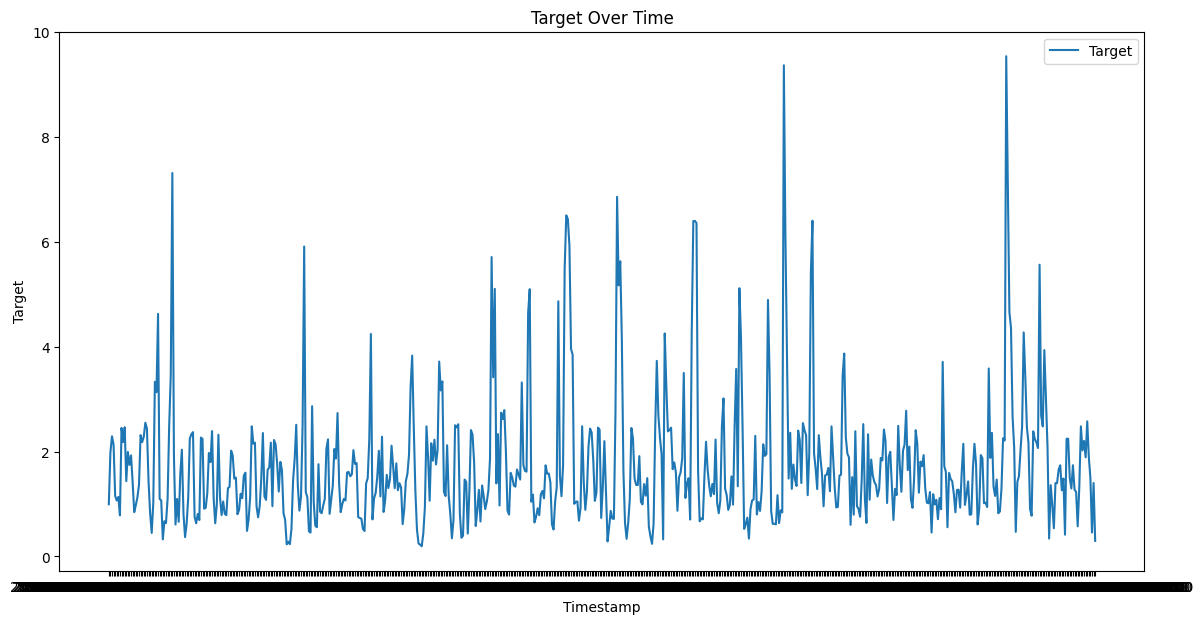

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('data_lec.csv')

data_lec_filtered = data.dropna(subset=['target'])

# Визуализация данных
plt.figure(figsize=(14, 7))
plt.plot(data_lec_filtered['timestamp'], data_lec_filtered['target'], label='Target')
plt.xlabel('Timestamp')
plt.ylabel('Target')
plt.title('Target Over Time')
plt.legend()
plt.show()

Features to drop: Index(['electric_ampere3', 'target_ffill'], dtype='object')
Data shape after dropping features: (81255, 47)


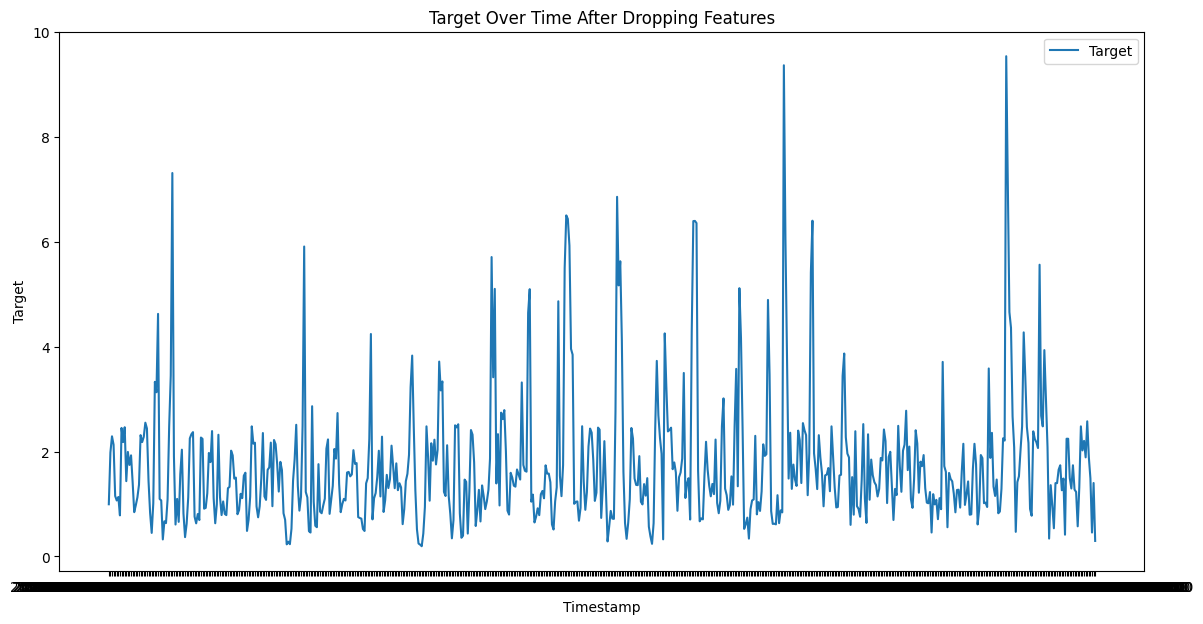

In [49]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data_lec.csv')

# Вычисление количества пропущенных значений для каждой фичи
missing_values = data.isnull().sum()

# Исключение таргета из списка пропущенных значений
missing_values = missing_values.drop('target')

# Сортировка фичей по количеству пропущенных значений по возрастанию
missing_values_sorted = missing_values.sort_values(ascending=True)

# Удаление двух самых пропущенных признаков
features_to_drop = missing_values_sorted.index[-2:]

# Удаление этих фичей из данных
data_filtered = data.drop(columns=features_to_drop)

# Вывод информации о пропущенных значениях после удаления фичей
print("Features to drop:", features_to_drop)
print("Data shape after dropping features:", data_filtered.shape)

data_lec_filtered = data.dropna(subset=['target'])

# Визуализация данных после удаления фичей
plt.figure(figsize=(14, 7))
plt.plot(data_lec_filtered['timestamp'], data_lec_filtered['target'], label='Target')
plt.xlabel('Timestamp')
plt.ylabel('Target')
plt.title('Target Over Time After Dropping Features')
plt.legend()
plt.show()

Построить виртуальный датчик (ВД) показателя в таргете, который сможет расчитывать значение в настоящий момент времени,  что существенно снизит нагрузку на лабораторию и даст возможность оператору быстрее реагировать на изменения в процессе.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_lec_filtered['timestamp'] = pd.to_datetime(data_lec_filtered['timestamp'])

data_lec_filtered = data_lec_filtered.fillna(data_lec_filtered.mean())  # Заполнение пропусков средним значением
# data = data.dropna()

X = data_lec_filtered.drop(columns=['target', 'timestamp'])
y = data_lec_filtered['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse = mean_squared_error(y_test, y_pred)  ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.7293737265486725
Root Mean Squared Error: 0.9949757331263416
R^2 Score: 0.17441754215854977


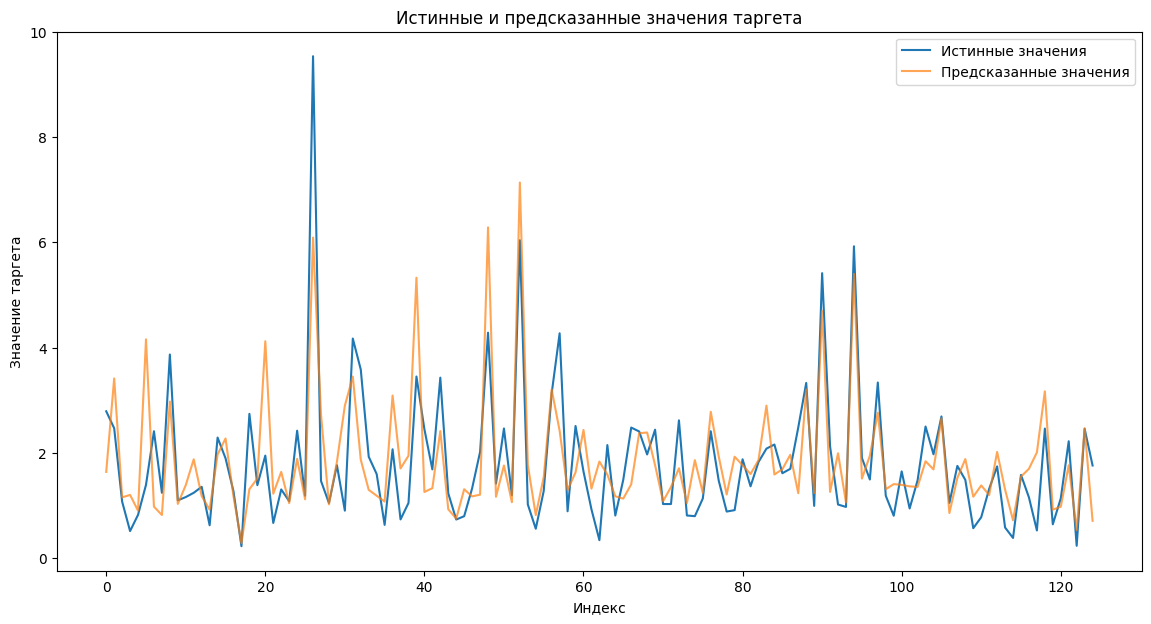

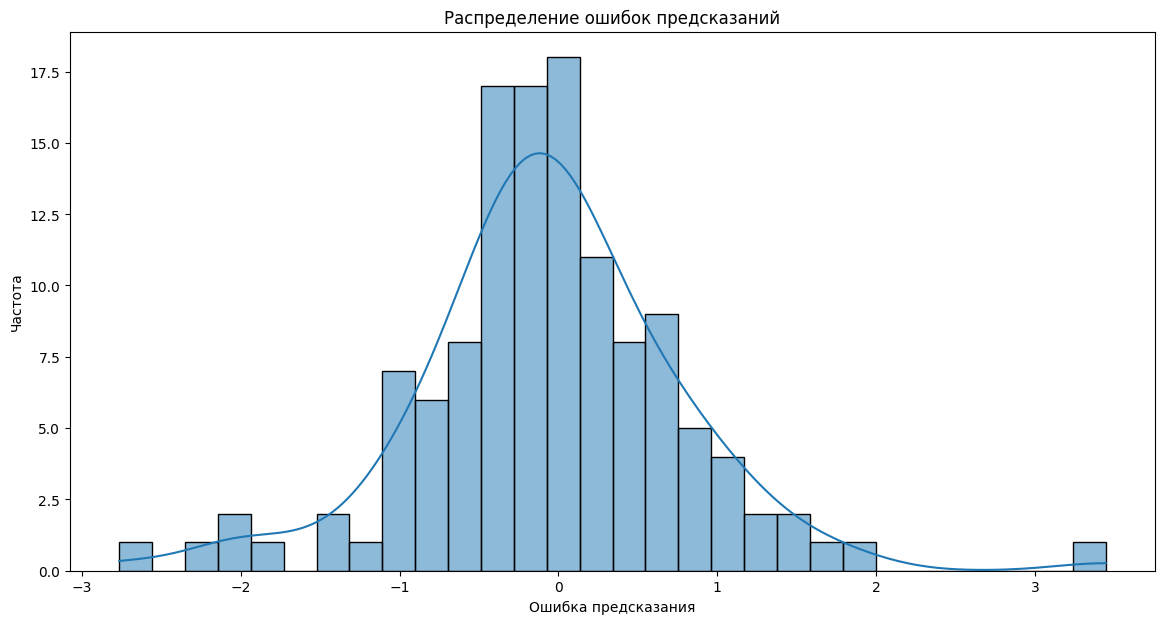

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Истинные значения')
plt.plot(y_pred, label='Предсказанные значения', alpha=0.7)
plt.xlabel('Индекс')
plt.ylabel('Значение таргета')
plt.title('Истинные и предсказанные значения таргета')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot((y_test - y_pred), bins=30, kde=True)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказаний')
plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data_lec_filtered['timestamp'] = pd.to_datetime(data_lec_filtered['timestamp'])

data_lec_filtered = data_lec_filtered.fillna(data_lec_filtered.mean())  # Заполнение пропусков средним значением

X = data_lec_filtered.drop(columns=['target', 'timestamp'])
y = data_lec_filtered['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


<ipython-input-50-1be1026b5d61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lec_filtered['timestamp'] = pd.to_datetime(data_lec_filtered['timestamp'])


Лучшие параметры: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.7553027191772893


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

data['timestamp'] = pd.to_datetime(data['timestamp'])

# Feature Engineering
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month

data = data.fillna(data.mean())

Q1 = data.drop(columns=['target', 'timestamp']).quantile(0.25)
Q3 = data.drop(columns=['target', 'timestamp']).quantile(0.75)
IQR = Q3 - Q1
data = data[~((data.drop(columns=['target', 'timestamp']) < (Q1 - 1.5 * IQR)) | (data.drop(columns=['target', 'timestamp']) > (Q3 + 1.5 * IQR))).any(axis=1)]

data = data.dropna(subset=['target'])

X = data.drop(columns=['target', 'timestamp'])
y = data['target']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X.drop(columns=['hour', 'day_of_week', 'month']))

X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.drop(columns=['hour', 'day_of_week', 'month']).columns))
X_final = pd.concat([X_poly_df, X[['hour', 'day_of_week', 'month']].reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'RandomForest Mean Absolute Error: {mae}')

scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f'RandomForest Cross-validated MAE: {-np.mean(scores)}')

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost Mean Absolute Error: {mae_xgb}')

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print(f'LightGBM Mean Absolute Error: {mae_lgbm}')

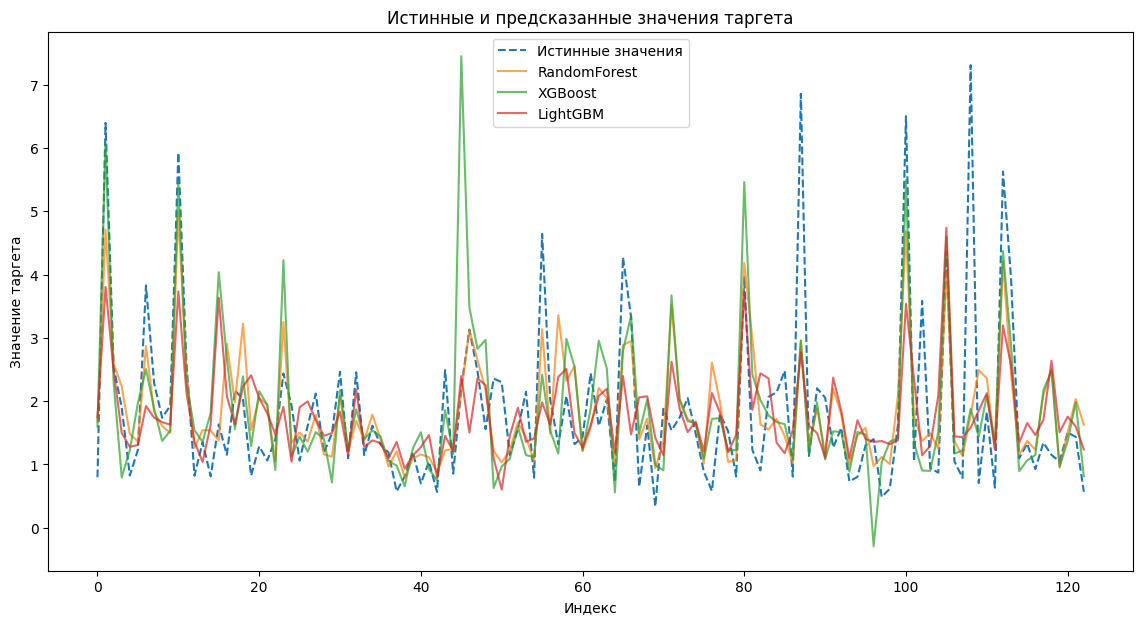

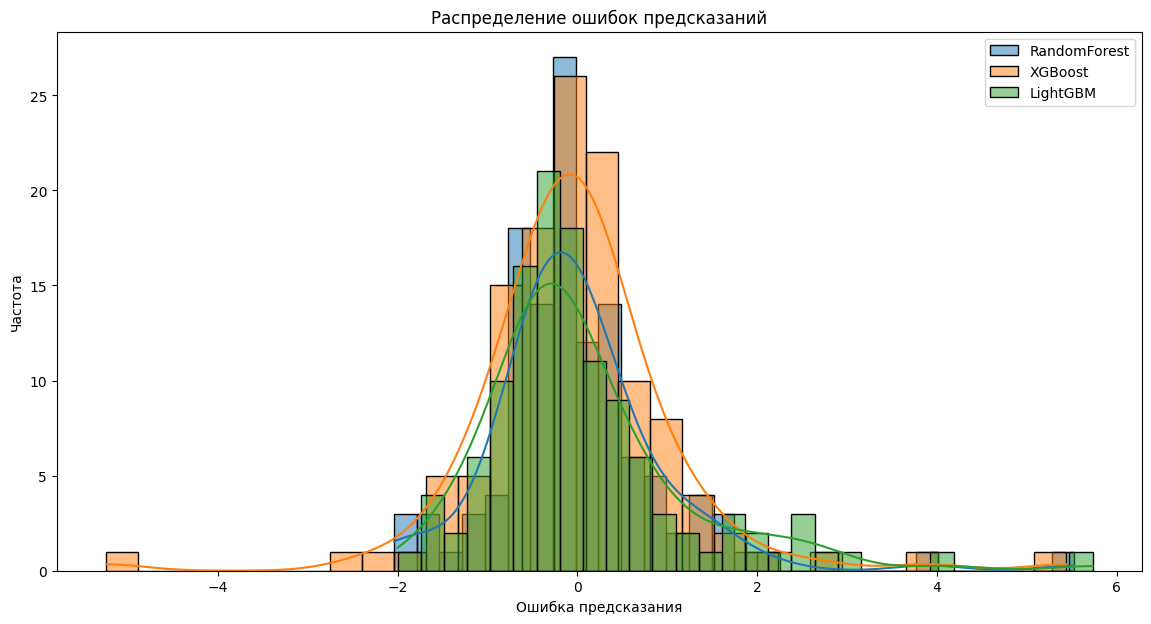

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Истинные значения', linestyle='--')
plt.plot(y_pred, label='RandomForest', alpha=0.7)
plt.plot(y_pred_xgb, label='XGBoost', alpha=0.7)
plt.plot(y_pred_lgbm, label='LightGBM', alpha=0.7)
plt.xlabel('Индекс')
plt.ylabel('Значение таргета')
plt.title('Истинные и предсказанные значения таргета')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot((y_test - y_pred), bins=30, kde=True, label='RandomForest', alpha=0.5)
sns.histplot((y_test - y_pred_xgb), bins=30, kde=True, label='XGBoost', alpha=0.5)
sns.histplot((y_test - y_pred_lgbm), bins=30, kde=True, label='LightGBM', alpha=0.5)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказаний')
plt.legend()
plt.show()

Прогнозная модель, которая на горизонте в 15 минут может установить значение таргета:

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_lec_filtered['timestamp'] = pd.to_datetime(data_lec_filtered['timestamp'])

data_lec_filtered = data_lec_filtered.fillna(data_lec_filtered.mean())
# data = data.dropna()

# Создание нового таргета, смещенного на 15 минут вперед
data_lec_filtered['target_shifted'] = data_lec_filtered['target'].shift(-15)

# Удаление строк, для которых нет значений в target_shifted
data_lec_filtered = data_lec_filtered.dropna(subset=['target_shifted'])

X = data_lec_filtered.drop(columns=['target', 'target_shifted', 'timestamp'])
y = data_lec_filtered['target_shifted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse = mean_squared_error(y_test, y_pred)  ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.6958791592920353
Root Mean Squared Error: 1.198557392957497
R^2 Score: 0.3408633966804494


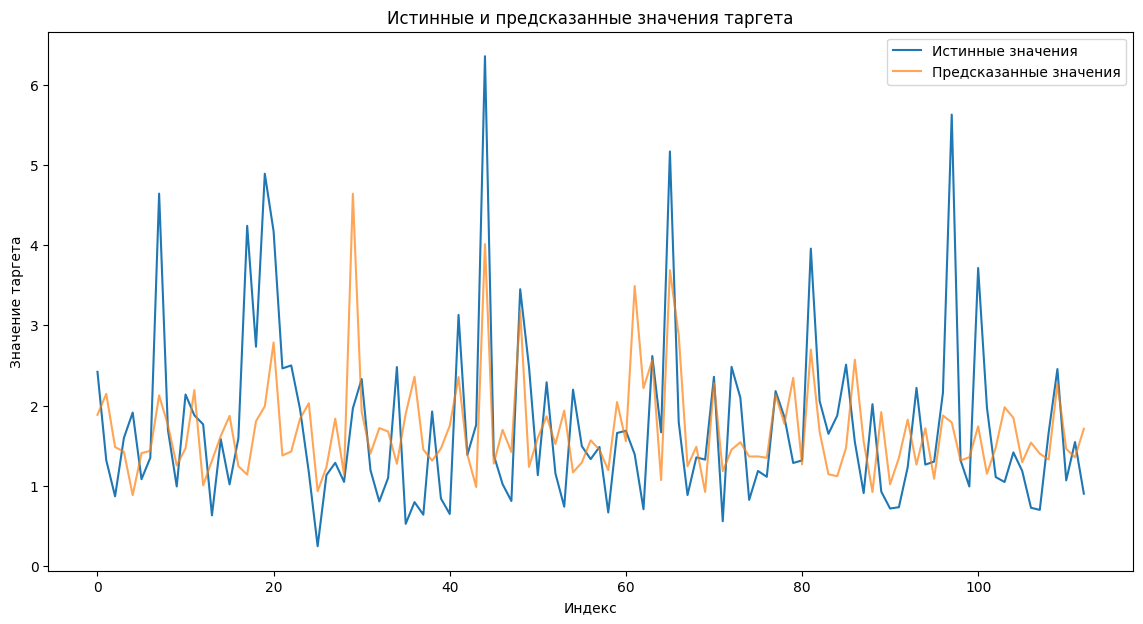

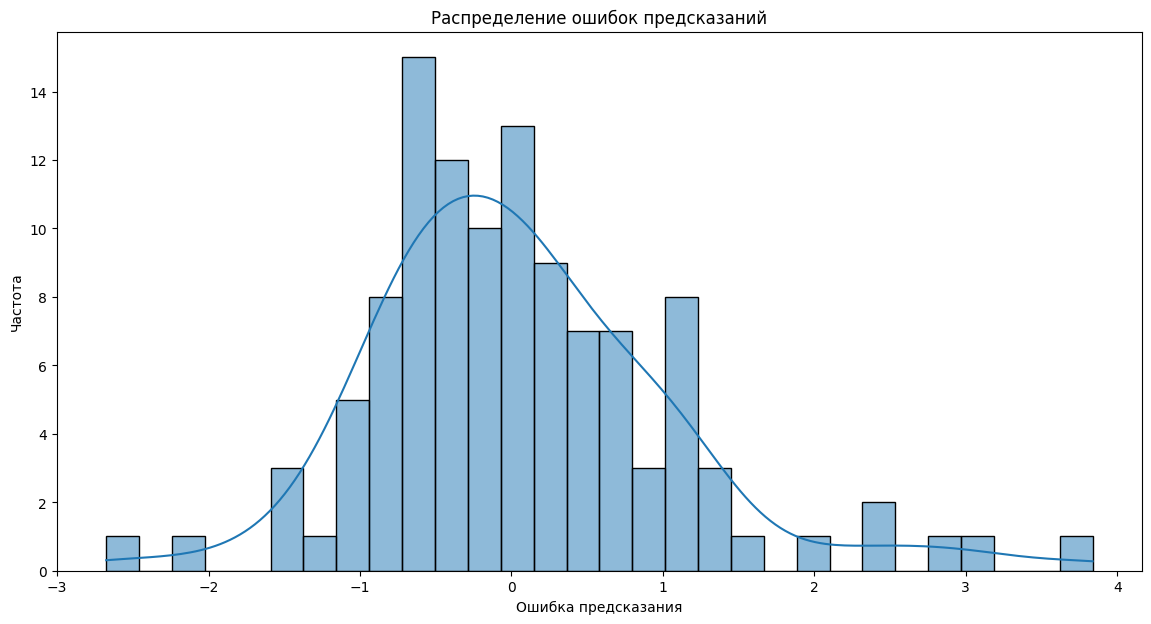

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# График истинных и предсказанных значений таргета
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Истинные значения')
plt.plot(y_pred, label='Предсказанные значения', alpha=0.7)
plt.xlabel('Индекс')
plt.ylabel('Значение таргета')
plt.title('Истинные и предсказанные значения таргета')
plt.legend()
plt.show()

# График ошибок предсказаний
plt.figure(figsize=(14, 7))
sns.histplot((y_test - y_pred), bins=30, kde=True)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказаний')
plt.show()

Модель, которая может определить значение таргета в случае изменения показателя gas_consumption1 на шаг 150 (текущее значение + 150) в последующие 15 минут.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_lec_filtered['timestamp'] = pd.to_datetime(data_lec_filtered['timestamp'])

data_lec_filtered = data_lec_filtered.fillna(data_lec_filtered.mean())

# Создание нового признака gas_consumption1_increased
data_lec_filtered['gas_consumption1_increased'] = data_lec_filtered['gas_consumption1'] + 150

# Создание нового таргета, смещенного на 15 минут вперед
data_lec_filtered['target_shifted'] = data_lec_filtered['target'].shift(-15)

data_lec_filtered = data_lec_filtered.dropna(subset=['target_shifted'])

X = data_lec_filtered.drop(columns=['target', 'target_shifted', 'timestamp'])
y = data_lec_filtered['target_shifted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.56308384
Root Mean Squared Error: 0.7296289819131225
R^2 Score: 0.5635763162710392


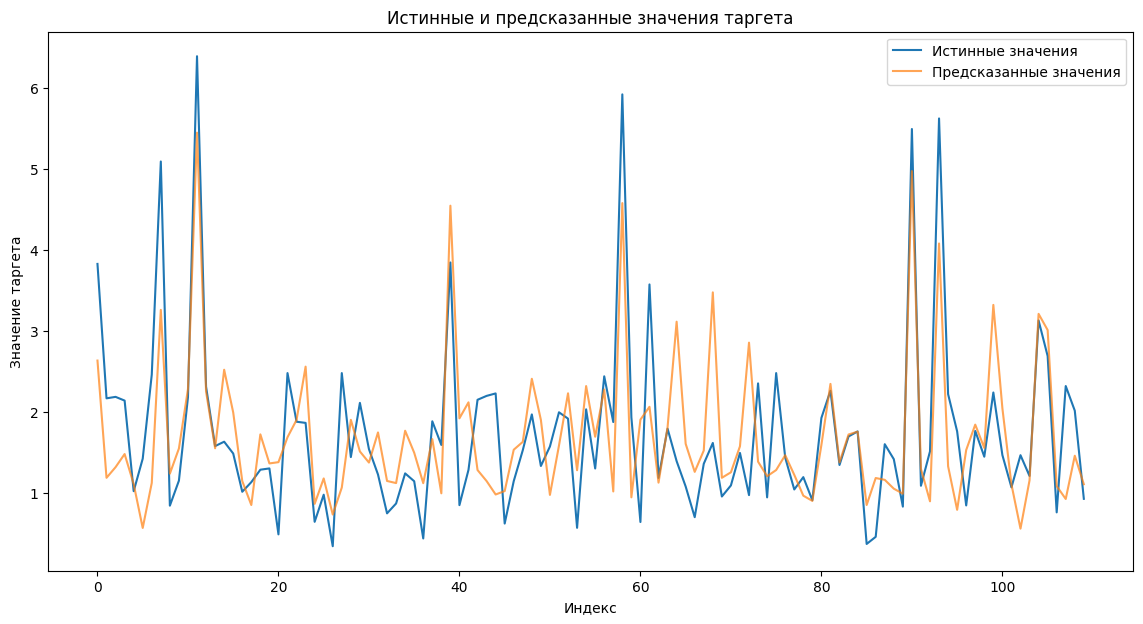

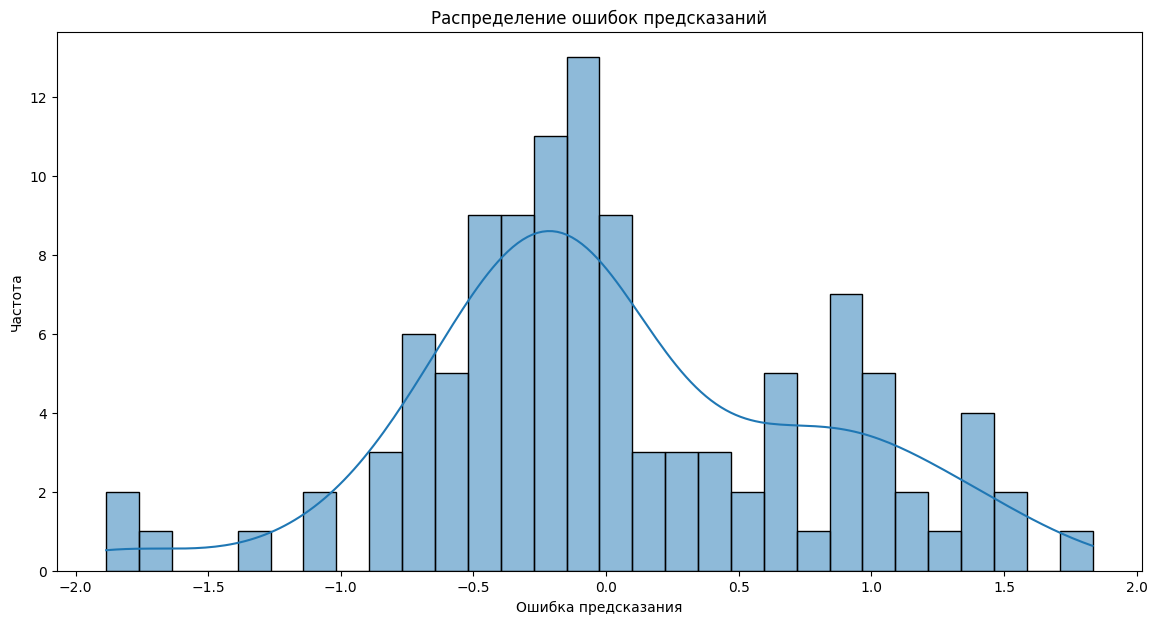

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# График истинных и предсказанных значений таргета
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Истинные значения')
plt.plot(y_pred, label='Предсказанные значения', alpha=0.7)
plt.xlabel('Индекс')
plt.ylabel('Значение таргета')
plt.title('Истинные и предсказанные значения таргета')
plt.legend()
plt.show()

# График ошибок предсказаний
plt.figure(figsize=(14, 7))
sns.histplot((y_test - y_pred), bins=30, kde=True)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказаний')
plt.show()